<a href="https://colab.research.google.com/github/wponciano/Analise-Exploratoria-Pandas-e-Python/blob/main/Proj_Analise_expl_Pandas_e_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
# upload arquivos
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [4]:
# criando nosso dataframe
df = pd.read_excel('AdventureWorks.xlsx')

In [6]:
# visualizando as  5 primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [7]:
# qtde de linhas e colunas
df.shape

(904, 16)

In [8]:
# verificar tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [10]:
# Qual a receita total?  - ATENÇÃO TEM QUE COLOCAR () NO FINAL
df['Valor Venda'].sum()

5984606.1426

In [16]:
# qual o custo total?  - Esse foi eu que fiz
custo_total = (df['Custo Unitário']*df['Quantidade']).sum()
print(custo_total)

2486783.05


In [17]:
# qual o custo total? - criando uma coluna nova
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])

In [ ]:
# para ver a nova coluna
df.head()

In [25]:
# qual o custo total? - valor final
round(df['Custo'].sum(),2)

2486783.05

In [31]:
# qual o lucro? Receita - Custo  - eu que fiz
Lucro = (df['Valor Venda'].sum() - custo_total)
print(Lucro)

3497823.0926


In [32]:
# qual o lucro? 
df['Lucro'] = df['Valor Venda'] - df['Custo']

In [36]:
# para ver a nova coluna
df.head(2)  # 2 só mostra 2 linhas

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [39]:
# qual o lucro?
round(df['Lucro'].sum(),2)

3497823.09

In [42]:
# Criando coluna para tempo de envio
df['Tempo envio'] = df['Data Envio'] - df['Data Venda']

In [43]:
# Vendo se criou a coluna Tempo envio
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5 days


In [46]:
df['Tempo envio'].dtypes  # vendo o tipo de dados da coluna

dtype('<m8[ns]')

In [ ]:
df.dtypes

In [57]:
df['ID Loja'].dtypes

dtype('int64')

Ver o tempo médio de envio por marcas e para isso tenho q transformar a coluna "Tempo envio" em numérica

In [53]:
# extraindo apenas os dias
df['Tempo envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [54]:
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5


In [55]:
# verificando o tipo de dados na coluna Tempo envio
df['Tempo envio'].dtypes

dtype('int64')

In [61]:
# média do tempo de envio por marcas
df.groupby('Marca')['Tempo envio'].mean()  # fica entre [] o que será calculado e entre () as linhas que irá dividir

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo envio, dtype: float64

Verificando dados faltantes

In [62]:
#verificando se temos dados faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo envio       0
dtype: int64

Saber o lucro por ano e por marca

In [68]:
# vamos agrupar por ano e por marca
df.groupby([df['Data Venda'].dt.year,'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [67]:
# remover a notação científica
pd.options.display.float_format = '{:20,.2f}'.format

In [70]:
# resetando o index e guardando lucro ano e marca em formato de tabela
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [72]:
# qual o total de produtos vendidos?
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

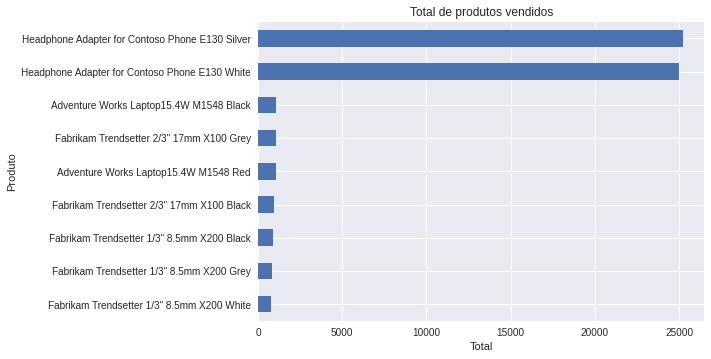

In [100]:
# gráfico dos produtos vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True).plot.barh(title = 'Total de produtos vendidos')
plt.xlabel("Total")
plt.ylabel("Produto");

Text(0, 0.5, 'Receita')

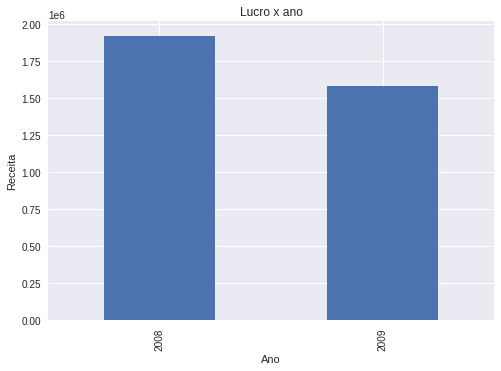

In [101]:
# gráfico lucro por ano
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title='Lucro x ano')
plt.xlabel('Ano')
plt.ylabel('Receita')

In [89]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [90]:
# criando uma tabela que só tem as vendas de 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]

In [92]:
# verificando nova tabela
df_2009.head(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12


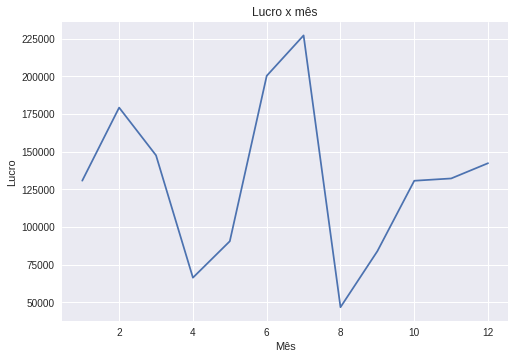

In [129]:
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title='Lucro x mês')
plt.xlabel('Mês')
plt.ylabel('Lucro'); # ; tira os valores na parte de cima do grágico

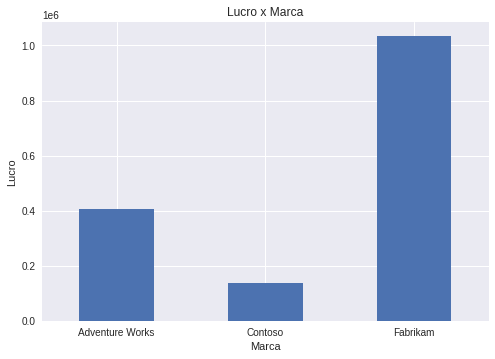

In [126]:
# gráfico lucro x marca
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

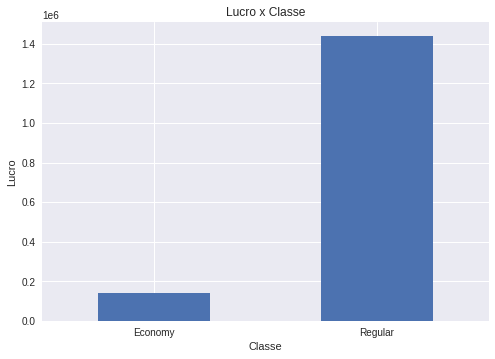

In [125]:
# gráfico lucro por classe
df_2009.groupby('Classe')['Lucro'].sum().plot.bar(title='Lucro x Classe')
plt.xlabel('Classe')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal'); # vai colocar o texto na horizontal, default é ser vertical

In [111]:
# estatística de toda tabela
df.describe()

,ID Loja,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Custo,Lucro,Tempo envio
count,904.00,904.00,904.00,904.00,904.00,904.00,904.00,904.00,904.00,904.00,904.00
mean,270.02,"1,225.24","19,029.09",272.01,742.53,62.95,689.12,"6,620.14","2,750.87","3,869.27",8.54
std,50.96,706.70,96.43,129.77,368.59,148.95,822.36,"4,319.41","1,646.07","2,823.81",3.06
min,199.00,366.00,"18,815.00",5.09,9.99,2.00,0.00,159.84,81.44,78.40,4.00
25%,199.00,384.00,"18,964.75",324.69,758.00,6.00,0.00,"3,920.00","1,742.90","2,001.72",6.00
50%,306.00,"1,202.00","19,060.00",330.66,980.00,9.00,461.17,"5,798.70","2,091.48","3,405.24",9.00
75%,307.00,"1,226.00","19,107.00",348.58,998.00,17.00,"1,005.08","7,986.00","3,571.59","4,670.68",11.00
max,307.00,"2,497.00","19,145.00",348.58,999.00,"1,560.00","6,272.00","29,400.00","11,154.56","19,659.30",20.00


In [115]:
# estatística de apenas uma coluna
df['Tempo envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo envio, dtype: float64

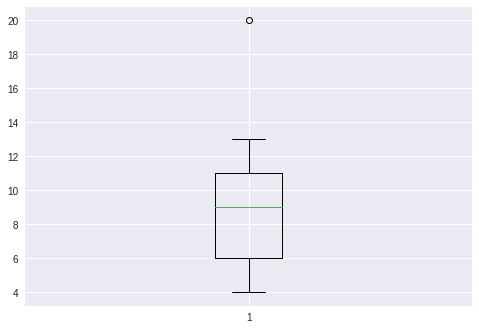

In [119]:
#Gráfico de Boxplot
plt.boxplot(df['Tempo envio']);

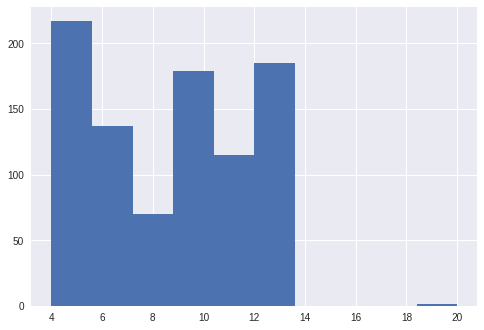

In [123]:
#Histograma
plt.hist(df['Tempo envio']);

In [130]:
#Tempo mínimo de envio
df['Tempo envio'].min()

4

In [131]:
# Tempo max de envio
df['Tempo envio'].max()

20

In [132]:
# identificando ponto discrepante - que é o 20
df[df['Tempo envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [133]:
# salvando no excel 
df.to_csv('df_vendas_novo.csv', index=False) # index False é para não levar a primeira coluna, antes de Data Venda